# **CLIMATE CHANGE -social media-comments-project**

In [1]:
#The aim of this project is to analyse a social media database  containing various comments about climate change and people's responses to these comments
#Sentiment Analysis: Gauge public opinion on climate change and NASA's communicationstrategies.
#Trend Analysis: Identify shifts in public sentiment over the specified period.
#Engagement Analysis: Understand the correlation between the content of a post and user engagement.
#Topic Modeling: Discover prevalent themes in public discourse about climate change.

In [2]:
!pip install -U kaleido
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.7 MB/s eta 0:00:00


In [3]:
main_df=pd.read_csv("/content/drive/MyDrive/CLIMATE_CHANGE/climate_nasa.csv")

In [4]:
main_df.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [5]:
main_df['text'] = main_df['text'].astype(str)

In [6]:
#reemoving stopwords from the text column

import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")


# Remove stopwordstoken.text for token in main_df["text"] i
main_df["text"] = main_df["text"].apply(lambda text: ' '.join([token.text for token in nlp(text) if not token.is_stop]))


In [7]:
main_df["text"]

,text
0,Neat comparison heard . \n CO2 like disco bal...
1,excellent way visualise invisible ! Thanks
2,CO2 / ghg troposphere affect stratosphere ? wa...
3,excellent post ! defo feel difference - drink ...
4,"Yes , carbon dioxide harm Earth like people ma..."
...,...
517,hope peak 😞
518,error margin temperature estimations 200 years...
519,volenteerly help reducing Globall warming
520,Sergio Yepes


In [8]:

#CHANGING date column from object dtype to datetime data type
#breaks down the datetime column into 6 different features or columns
#and deletes the original date column
def dateextract(main_df):
  main_df["date"]=pd.to_datetime(main_df["date"])
  main_df["year_of_comment"]=pd.DatetimeIndex(main_df["date"]).year
  main_df["month_of_comment"]=pd.DatetimeIndex(main_df["date"]).month
  main_df["monthday_of_comment"]=pd.DatetimeIndex(main_df["date"]).day
  main_df["hour_of_comment"]=pd.DatetimeIndex(main_df["date"]).hour
  main_df["minute_of_comment"]=pd.DatetimeIndex(main_df["date"]).minute
  main_df["second_of_comment"]=pd.DatetimeIndex(main_df["date"]).second
  main_df=main_df.drop("date",axis=1)
  return main_df

In [9]:
main_df=dateextract(main_df)

In [10]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   likesCount           522 non-null    int64  
 1   profileName          522 non-null    object 
 2   commentsCount        244 non-null    float64
 3   text                 522 non-null    object 
 4   year_of_comment      522 non-null    int32  
 5   month_of_comment     522 non-null    int32  
 6   monthday_of_comment  522 non-null    int32  
 7   hour_of_comment      522 non-null    int32  
 8   minute_of_comment    522 non-null    int32  
 9   second_of_comment    522 non-null    int32  
dtypes: float64(1), int32(6), int64(1), object(2)
memory usage: 28.7+ KB


In [11]:
#Using natural language toolkit to perfprm sentiment analysis and distinguish the comments into positive ,negative and  neutral comments
import nltk
nltk.download("vader_lexicon")
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
#calculate sentiment
analyzer =SIA()
main_df["compound"]=[analyzer.polarity_scores(x)["compound"] for x in main_df["text"]]
main_df["negative"]=[analyzer.polarity_scores(x)["neg"] for x in main_df["text"]]
main_df["neutral"]=[analyzer.polarity_scores(x)["neu"] for x in main_df["text"]]
main_df["positive"]=[analyzer.polarity_scores(x)["pos"] for x in main_df["text"]]
main_df["sentiment"]=np.nan
for i,s in  main_df["compound"].items():
  if s<-0.05:
    main_df["sentiment"].loc[i]="Negative"
  elif s>0.05:
    main_df["sentiment"].loc[i]="Positive"
  else:
    main_df["sentiment"].loc[i]= "Neutral"






[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-11-33378199be42>:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  main_df["sentiment"].loc[i]="Positive"
<ipython-input-11-33378199be42>:16: SettingWithCopyW

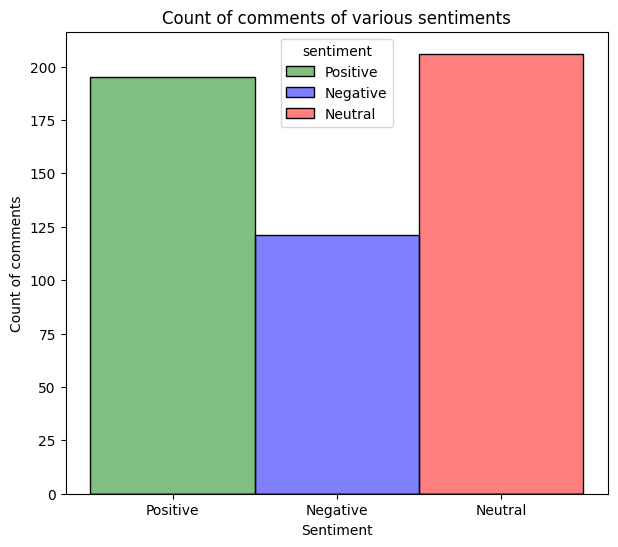

In [12]:
#using barplot method to visualize sentiment distribution
plt.figure(figsize=(7,6))
sns.histplot(x=main_df["sentiment"],hue=main_df["sentiment"],palette=["green","blue","red"])
plt.xlabel("Sentiment")
plt.ylabel("Count of comments")
plt.title("Count of comments of various sentiments")
plt.show()
#main_df["sentiment"].value_counts().plot(kind="bar",color=["red","black","yellow"])

In [13]:
#The highest number of comments are of a neutral sentiment and comments  having a negative sentiment are the lowest in number

In [14]:
main_df["commentsCount"].fillna(0,inplace=True)

<ipython-input-14-adb2507a9086>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_df["commentsCount"].fillna(0,inplace=True)


In [15]:
#convert the object type profilename column into categorical type using astype()
main_df["profileName"]=main_df["profileName"].astype("category").cat.as_ordered()
#encoding the categorical sentiment column
main_df["profileName"]=pd.Categorical(main_df["profileName"]).codes

In [16]:
main_df["profileName"].value_counts()

,count
profileName,
469,3
27,3
341,3
263,3
134,3
...,...
126,1
216,1
85,1


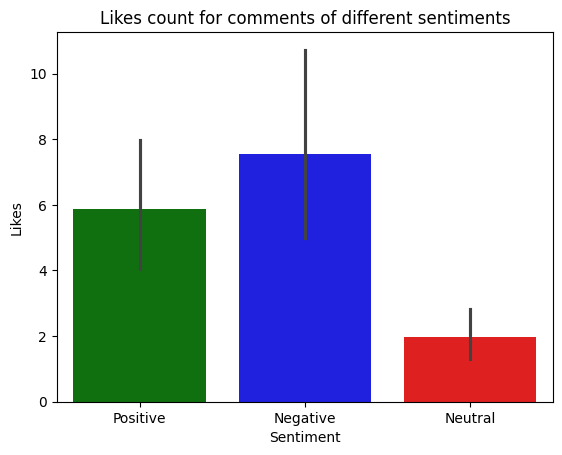

In [17]:
#using  barplot method to visualize the distribution of likes recieved by different comments
plt.figure()
sns.barplot(x=main_df["sentiment"],y=main_df["likesCount"],hue=main_df["sentiment"],palette=["green","blue","red"])
plt.xlabel("Sentiment")
plt.ylabel("Likes")
plt.title("Likes count for comments of different sentiments")
plt.show()

In [18]:
#The average number of likes recieved by negative comments are significantly higher
#Negative comments  recieve  more likes than positive and neutral comments

In [19]:
a1=main_df[main_df["sentiment"]=="Positive"]["likesCount"].mean()
a2=main_df[main_df["sentiment"]=="Negative"]["likesCount"].mean()
a3=main_df[main_df["sentiment"]=="Neutral"]["likesCount"].mean()

print(f"The average likes a positive comment got is {round(a1,0)}")
print(f"The average likes a negative comment got is {round(a2,0)}")
print(f"The average likes a neutral comment got is {round(a3,0)}")

The average likes a positive comment got is 6.0
The average likes a negative comment got is 8.0
The average likes a neutral comment got is 2.0


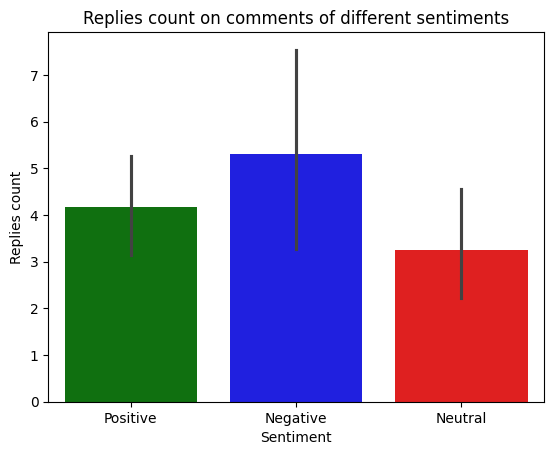

In [20]:
plt.figure()
sns.barplot(x=main_df["sentiment"],y=main_df["commentsCount"],hue=main_df["sentiment"],palette=["green","blue","red"])
plt.xlabel("Sentiment")
plt.ylabel("Replies count")
plt.title("Replies count on comments of different sentiments")
plt.show()

In [21]:
#Negative comments recieve more replies than positive and neutral comments
#Negative comments recieve higher engagement than the rest

In [22]:
A1=main_df[main_df["sentiment"]=="Positive"]["commentsCount"].mean()
A2=main_df[main_df["sentiment"]=="Negative"]["commentsCount"].mean()
A3=main_df[main_df["sentiment"]=="Neutral"]["commentsCount"].mean()

print(f"The average comments a positive post got is {round(A1,0)}")
print(f"The average comments a negative post got is {round(A2,0)}")
print(f"The average comments a neutral post got is {round(A3,0)}")

The average comments a positive post got is 4.0
The average comments a negative post got is 5.0
The average comments a neutral post got is 3.0


In [23]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   likesCount           522 non-null    int64  
 1   profileName          522 non-null    int16  
 2   commentsCount        522 non-null    float64
 3   text                 522 non-null    object 
 4   year_of_comment      522 non-null    int32  
 5   month_of_comment     522 non-null    int32  
 6   monthday_of_comment  522 non-null    int32  
 7   hour_of_comment      522 non-null    int32  
 8   minute_of_comment    522 non-null    int32  
 9   second_of_comment    522 non-null    int32  
 10  compound             522 non-null    float64
 11  negative             522 non-null    float64
 12  neutral              522 non-null    float64
 13  positive             522 non-null    float64
 14  sentiment            522 non-null    object 
dtypes: float64(5), int16(1), int32(6), int64

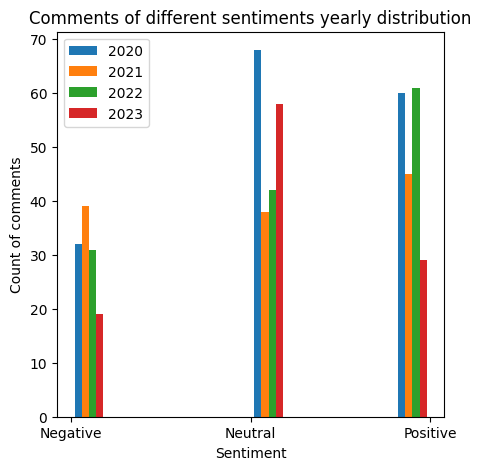

In [24]:
plt.figure(figsize=(5,5))
#sns.histplot(x=(main_df[main_df["year_of_comment"]==2020]["sentiment"]),label="2020")
#sns.histplot(x=(main_df[main_df["year_of_comment"]==2021]["sentiment"]),label="2021")
#sns.histplot(x=(main_df[main_df["year_of_comment"]==2022]["sentiment"]),label="2022")
#sns.histplot(x=(main_df[main_df["year_of_comment"]==2023]["sentiment"]),label="2023")
plt.hist([main_df[main_df["year_of_comment"]==2020]["sentiment"],main_df[main_df["year_of_comment"]==2021]["sentiment"],main_df[main_df["year_of_comment"]==2022]["sentiment"],main_df[main_df["year_of_comment"]==2023]["sentiment"]])
plt.legend(["2020","2021","2022","2023"])
plt.xlabel("Sentiment")
plt.ylabel("Count of comments")
plt.title("Comments of different sentiments yearly distribution")
plt.show()

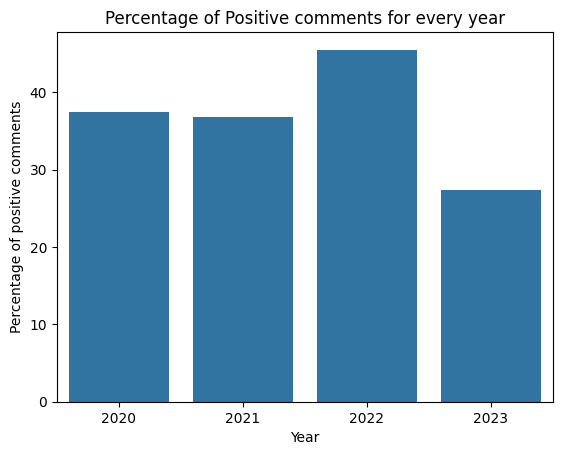

In [25]:
df0=main_df[main_df["year_of_comment"]==2020]
df1=main_df[main_df["year_of_comment"]==2021]
df2=main_df[main_df["year_of_comment"]==2022]
df3=main_df[main_df["year_of_comment"]==2023]
a0=(len(df0[df0["sentiment"]=="Positive"])/len(df0["sentiment"]))*100
a1=(len(df1[df1["sentiment"]=="Positive"])/len(df1["sentiment"]))*100
a2=(len(df2[df2["sentiment"]=="Positive"])/len(df2["sentiment"]))*100
a3=(len(df3[df3["sentiment"]=="Positive"])/len(df3["sentiment"]))*100

plt.figure()

sns.barplot(x=["2020","2021","2022","2023"],y=[a0,a1,a2,a3])
plt.xlabel("Year")
plt.ylabel("Percentage of positive comments")
plt.title("Percentage of Positive comments for every year")
plt.show()

In [26]:
#The percentage positive comments is highest for 2022 and lowest for 2023

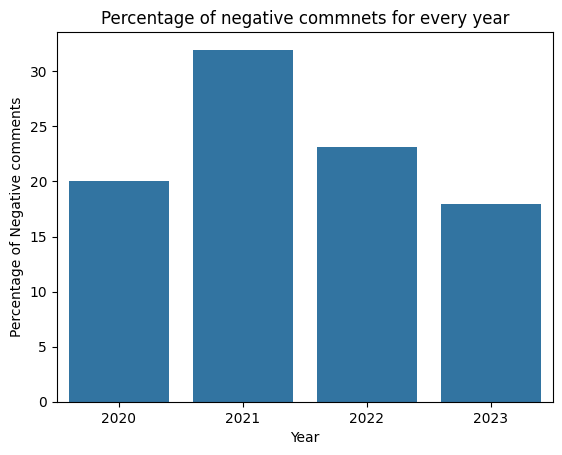

In [27]:
a0=(len(df0[df0["sentiment"]=="Negative"])/len(df0["sentiment"]))*100
a1=(len(df1[df1["sentiment"]=="Negative"])/len(df1["sentiment"]))*100
a2=(len(df2[df2["sentiment"]=="Negative"])/len(df2["sentiment"]))*100
a3=(len(df3[df3["sentiment"]=="Negative"])/len(df3["sentiment"]))*100

plt.figure()

sns.barplot(x=["2020","2021","2022","2023"],y=[a0,a1,a2,a3])
plt.xlabel("Year")
plt.ylabel("Percentage of Negative comments")
plt.title("Percentage of negative commnets for every year")
plt.show()

In [28]:
#The percentage negative comments are the highest for 2021 and the lowest for 2023

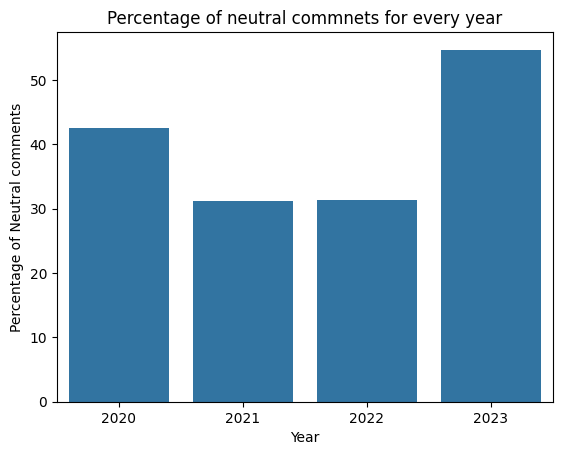

In [29]:
a0=(len(df0[df0["sentiment"]=="Neutral"])/len(df0["sentiment"]))*100
a1=(len(df1[df1["sentiment"]=="Neutral"])/len(df1["sentiment"]))*100
a2=(len(df2[df2["sentiment"]=="Neutral"])/len(df2["sentiment"]))*100
a3=(len(df3[df3["sentiment"]=="Neutral"])/len(df3["sentiment"]))*100

plt.figure()

sns.barplot(x=["2020","2021","2022","2023"],y=[a0,a1,a2,a3])
plt.xlabel("Year")
plt.ylabel("Percentage of Neutral comments")
plt.title("Percentage of neutral commnets for every year")
plt.show()

In [30]:
#the percentage of neutral comments is the highest for 2023 and the lowest for 2022 and 2021

In [31]:
from collections import Counter
df=pd.DataFrame(data=Counter(" ".join(main_df["text"]).split()).most_common(50),columns=["word","freq"])
from collections import Counter
df=pd.DataFrame(data=Counter(" ".join(main_df["text"]).split()).most_common(30),columns=["word","freq"])
df2=df[(df["word"]!="the") & (df["word"]!="to") & (df["word"]!="and") & (df["word"]!="of") & (df["word"]!="in") & (df["word"]!="a") & (df["word"]!="is") & (df["word"]!="it") & (df["word"]!="for")& (df["word"]!= "if")]
df3=df2[(df2["word"]!="?") & (df2["word"]!=".") & (df2["word"]!="!") & (df2["word"]!="@") & (df2["word"]!="%") & (df2["word"]!=")") & (df2["word"]!="(") & (df2["word"]!="*") & (df2["word"]!="-")& (df2["word"]!= "&")]
df4=df3[(df3["word"]!='"') & (df3["word"]!=",") & (df3["word"]!="_") & (df3["word"]!="$") & (df3["word"]!="°") & (df3["word"]!="=") & (df3["word"]!="+") & (df3["word"]!="...")]

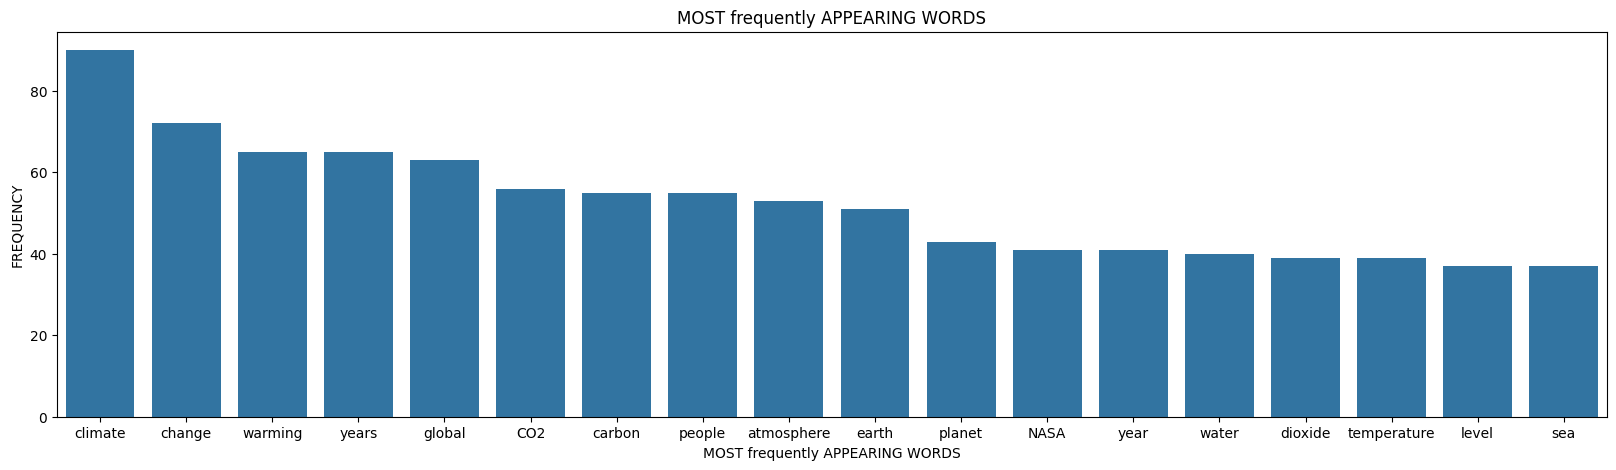

In [32]:
plt.figure(figsize=(20,5))
sns.barplot(x=df4["word"],y=df4["freq"])
plt.xlabel("MOST frequently APPEARING WORDS")
plt.ylabel("FREQUENCY")
plt.title("MOST frequently APPEARING WORDS")
plt.show()




In [33]:
#The most frequently used words are climate ,change ,warming ,years and global.

# **Final conclusions**


1). The highest number of comments are of a neutral sentiment and comments  having a negative sentiment are the lowest in number.
2). The average number of likes recieved by negative comments are significantly higher

3).Negative comments  recieve  more likes than positive and neutral comments

4).Negative comments recieve more replies than positive and neutral comments

5).Negative comments recieve higher engagement than the rest

6).The percentage positive comments is highest for 2022 and lowest for 2023

7).The percentage negative comments are the highest for 2021 and the lowest for 2023

8).The percentage of neutral comments is the highest for 2023 and the lowest for 2022 and 2021

9).The most frequently used words are climate ,change ,warming ,years and global.

